In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [124]:
print(os.listdir('/content'))

['.config', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'training_attack_types', 'kddcup.testdata.unlabeled.gz', 'kddcup.data.corrected', 'kddcup.testdata.unlabeled_10_percent.gz', 'resized_image.png', 'kddcup.data.gz', 'corrected.gz', 'img1.png', 'typo-correction.txt', 'kddcup.names', 'kddcup.data_10_percent_corrected', 'kddcup.data_10_percent.gz', 'sample_data']


In [125]:
with open("/content/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [126]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [127]:
with open("/content/training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [128]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [129]:
#Reading the dataset
path = "/content/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding Attack Type column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [130]:
df.shape

(494021, 43)

In [131]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [132]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [133]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [134]:
#Data Preprocessing
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [135]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['flag', 'protocol_type', 'service']

In [ ]:
#Categorical feature Distribution

In [136]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

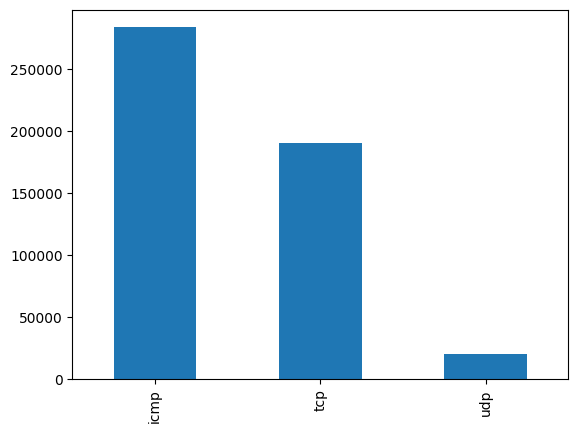

In [137]:
    bar_graph('protocol_type')

In [ ]:
#From the above graph, We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

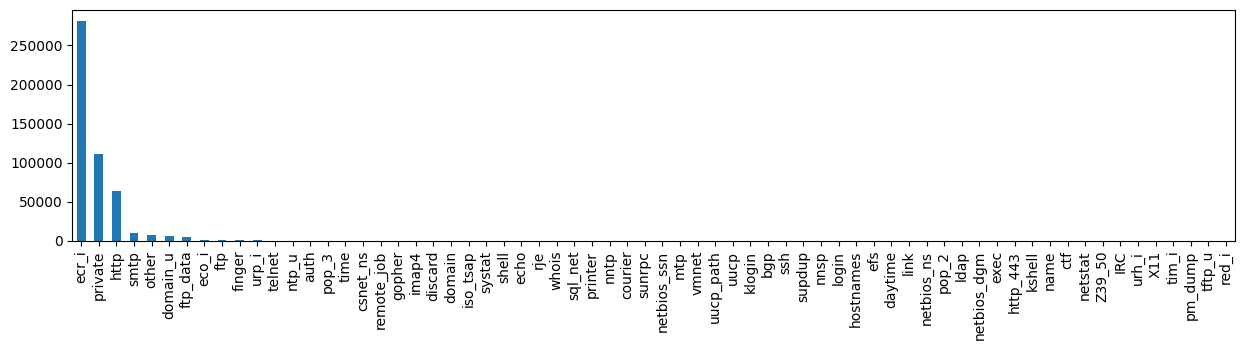

In [138]:
plt.figure(figsize=(15,3))
bar_graph('service')

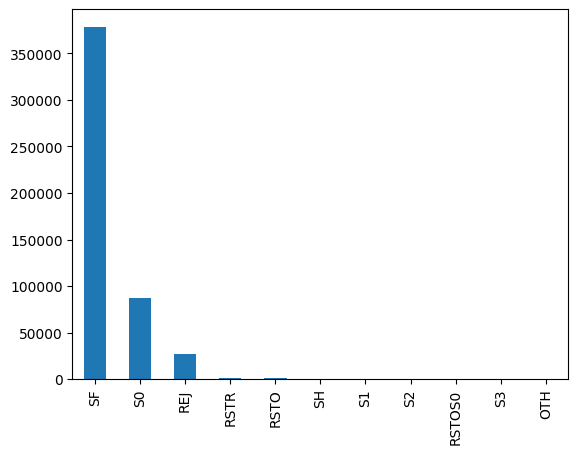

In [139]:
bar_graph('flag')

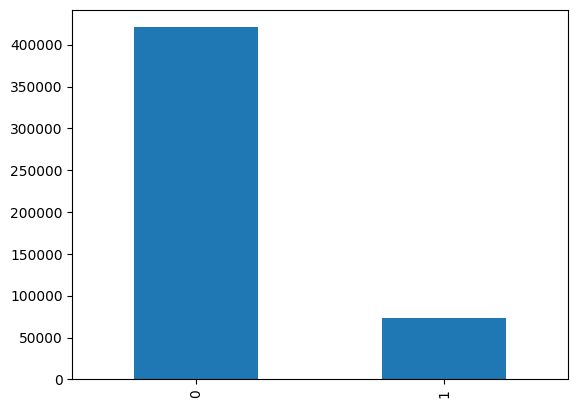

In [ ]:
bar_graph('logged_in')

In [ ]:
#logged_in - here 1 if successfully logged in 0 otherwise We notice that just 70000 packets are successfully logged in.

In [ ]:
#Target Feature distribution

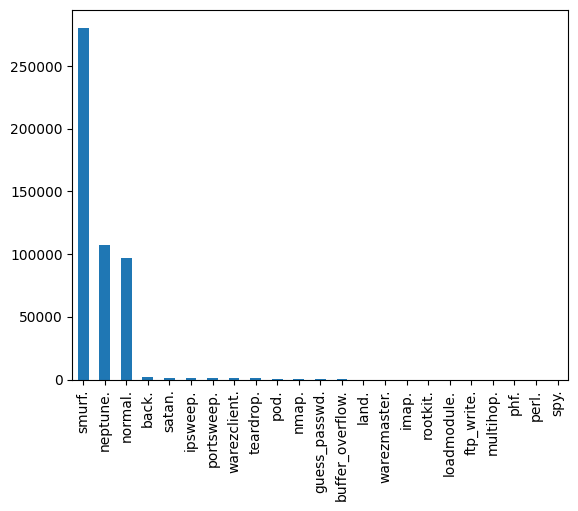

In [ ]:
bar_graph('target')

In [ ]:
#Attack Type - The attack types grouped by attack, it's what we will predict

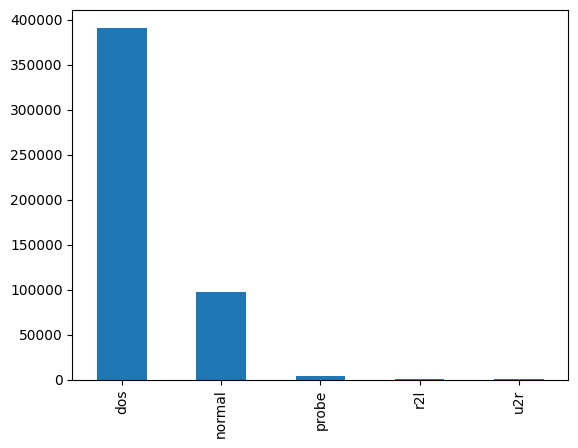

In [ ]:
bar_graph('Attack Type')

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

<ipython-input-140-cb546472f75e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')# drop columns with NaN
<ipython-input-140-cb546472f75e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


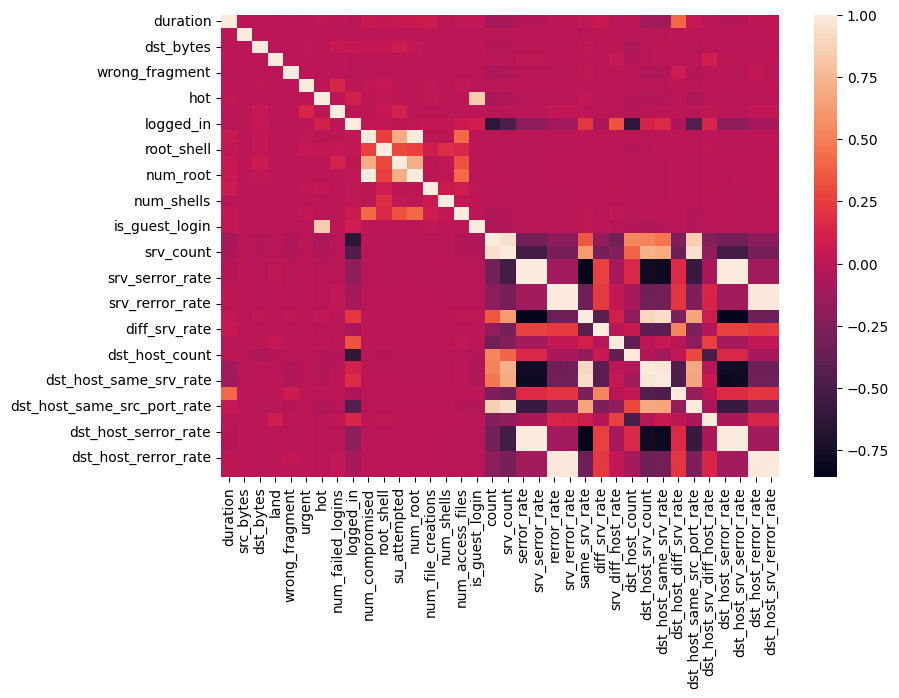

In [140]:
#Data Correlation
df = df.dropna('columns')# drop columns with NaN
df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values
corr = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr)
plt.show()

In [ ]:
df['num_root'].corr(df['num_compromised'])

0.9938277978737916

In [ ]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.998361507272553

In [ ]:
df['srv_count'].corr(df['count'])

0.9436670688882645

In [ ]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818242

In [ ]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572953835

In [ ]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373293

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
df.shape

(494021, 33)

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [ ]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

<ipython-input-40-2938f6df5f03>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

In [ ]:
#Feature Mapping

In [ ]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
df.drop('service',axis = 1,inplace= True)

In [ ]:
df.shape

(494021, 32)

In [ ]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [ ]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [ ]:
#Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


In [ ]:
#Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  0.640801191329956


In [ ]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.22470426559448242


In [ ]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


In [ ]:
#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  1.4735496044158936


In [ ]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.022006511688232422


In [ ]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


In [ ]:
#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  10.225057125091553


In [ ]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.4839775562286377


In [ ]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.99997583037759
Test score is: 0.9996074269906212


In [ ]:
#Support Vector machine

In [ ]:
from sklearn.svm import SVC
model4 = SVC(gamma = 'scale')
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  229.91230416297913


In [ ]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  94.27531361579895


In [ ]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


In [ ]:
#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression(max_iter=1200000)
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  45.244125843048096


In [ ]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  0.0448155403137207


In [ ]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211


In [ ]:
#Gradient boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(random_state=0)
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",end_time-start_time)

Training time:  440.16828203201294


In [ ]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

Testing time:  1.2631251811981201


In [ ]:
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9979304760811374
Test score is: 0.9977181693829856


In [ ]:
#training accuracy

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

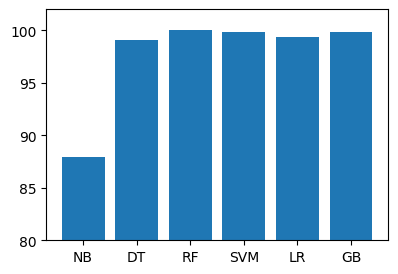

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [87.951,99.058,99.997,99.875,99.352,99.793]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [ ]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

In [ ]:
#Testing accuracy

<BarContainer object of 6 artists>

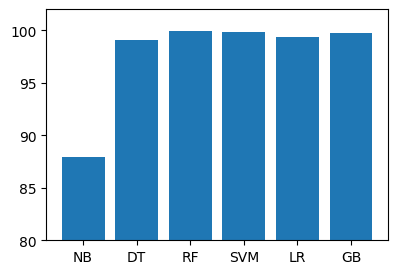

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [87.903,99.052,99.969,99.879,99.352,99.771]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [ ]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

In [ ]:
#training time

<BarContainer object of 6 artists>

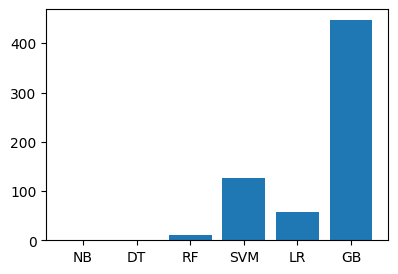

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('train_time_figure.png',bbox_inches='tight')

In [ ]:
#testing time

<BarContainer object of 6 artists>

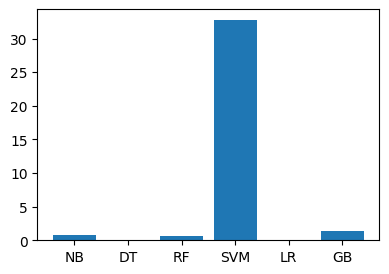

In [ ]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [ ]:
f.savefig('test_time_figure.png',bbox_inches='tight')

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class ProposedMultilayerPreprocessingMechanism:
    def __init__(self):
        # Define your preprocessing steps and parameters here
        self.scaler1 = StandardScaler()
        self.scaler2 = StandardScaler()

    def fit(self, X):
        # Implement fitting logic for your preprocessing steps
        X_scaled1 = self.scaler1.fit_transform(X)
        X_scaled2 = self.scaler2.fit_transform(X_scaled1)
        # Add more preprocessing steps as needed

    def transform(self, X):
        # Implement transformation logic for your preprocessing steps
        X_scaled1 = self.scaler1.transform(X)
        X_scaled2 = self.scaler2.transform(X_scaled1)
        # Add more preprocessing steps as needed
        return X_scaled2

    def fit_transform(self, X):
        # Implement combined fitting and transformation logic
        self.fit(X)
        return self.transform(X)

# Example usage in Google Colab
# Assuming you have a dataset named 'data'
# Replace 'data' with your actual dataset

# Split your data into features X and labels y
X = df.drop(columns=['Attack Type'])
y = df['Attack Type']

# Initialize and use the ProposedMultilayerPreprocessingMechanism
preprocessor = ProposedMultilayerPreprocessingMechanism()
X_transformed = preprocessor.fit_transform(X)



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class ProposedMultilayerPreprocessingMechanism:
    def __init__(self):
        # Define your preprocessing steps and parameters here
        self.scaler1 = StandardScaler()
        self.scaler2 = StandardScaler()

    def fit(self, X):
        # Implement fitting logic for your preprocessing steps
        X_scaled1 = self.scaler1.fit_transform(X)
        X_scaled2 = self.scaler2.fit_transform(X_scaled1)
        # Add more preprocessing steps as needed

    def transform(self, X):
        # Implement transformation logic for your preprocessing steps
        X_scaled1 = self.scaler1.transform(X)
        X_scaled2 = self.scaler2.transform(X_scaled1)
        # Add more preprocessing steps as needed
        return X_scaled2

    def fit_transform(self, X):
        # Implement combined fitting and transformation logic
        self.fit(X)
        return self.transform(X)

# Example usage in Google Colab
# Assuming you have a dataset named 'data'
# Replace 'data' with your actual dataset

# Split your data into features X and labels y
X = df.drop(columns=['Attack Type'])
y = df['Attack Type']

# Initialize and use the ProposedMultilayerPreprocessingMechanism
preprocessor = ProposedMultilayerPreprocessingMechanism()

# Print original dataset statistics
print("Original Dataset Statistics:")
print(X.describe())

# Fit and transform the data using the preprocessing mechanism
X_transformed = preprocessor.fit_transform(X)

# Print transformed dataset statistics
print("\nTransformed Dataset Statistics:")
print(pd.DataFrame(X_transformed).describe())

# Print some information about the scaling parameters
print("\nScaling Parameters:")
print("Scaler 1 Mean:", preprocessor.scaler1.mean_)
print("Scaler 1 Scale:", preprocessor.scaler1.scale_)
print("Scaler 2 Mean:", preprocessor.scaler2.mean_)
print("Scaler 2 Scale:", preprocessor.scaler2.scale_)


Original Dataset Statistics:
            duration  protocol_type           flag     src_bytes  \
count  494021.000000  494021.000000  494021.000000  4.940210e+05   
mean       47.979302       0.467132       0.297730  3.025610e+03   
std       707.746472       0.575606       0.597424  9.882181e+05   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%         0.000000       0.000000       0.000000  4.500000e+01   
50%         0.000000       0.000000       0.000000  5.200000e+02   
75%         0.000000       1.000000       0.000000  1.032000e+03   
max     58329.000000       2.000000      10.000000  6.933756e+08   

          dst_bytes           land  wrong_fragment         urgent  \
count  4.940210e+05  494021.000000   494021.000000  494021.000000   
mean   8.685324e+02       0.000045        0.006433       0.000014   
std    3.304000e+04       0.006673        0.134805       0.005510   
min    0.000000e+00       0.000000        0.000000       0.000000   
25%    0.0000

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assume 'Attack Type' is the target variable, and other columns are features
X = df.drop(columns=['Attack Type'])
y = df['Attack Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)


Accuracy: 1.00

Confusion Matrix:
[[78353     0     1     1     0]
 [    2 19338     3    10     0]
 [    0     8   841     1     0]
 [    0     2     1   231     1]
 [    0     2     0     0    10]]

Classification Report:
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78355
      normal       1.00      1.00      1.00     19353
       probe       0.99      0.99      0.99       850
         r2l       0.95      0.98      0.97       235
         u2r       0.91      0.83      0.87        12

    accuracy                           1.00     98805
   macro avg       0.97      0.96      0.97     98805
weighted avg       1.00      1.00      1.00     98805



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Generate synthetic data (replace this with your actual data loading)
np.random.seed(42)
data_size = 1000
features = np.random.rand(data_size, 10)
labels = np.random.choice([0, 1], size=data_size)

# Create a DataFrame from synthetic data (replace this with your actual data loading)
df = pd.DataFrame(features, columns=[f'feature_{i}' for i in range(1, 11)])
df['label'] = labels

# Split the data into features and labels
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the DT-ID model (replace this with your DT-ID model implementation)
dt_id_model = RandomForestClassifier(random_state=42)
dt_id_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_id_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Calculate evaluation metrics
true_positive = conf_matrix[1, 1]
false_positive = conf_matrix[0, 1]
false_negative = conf_matrix[1, 0]
correctness_rate = (true_positive + (len(y_test) - false_positive - false_negative)) / len(y_test)
detection_rate = true_positive / (true_positive + false_negative)
false_positive_rate = false_positive / (false_positive + conf_matrix[0, 0])
false_negative_rate = false_negative / (false_negative + conf_matrix[1, 1])

# Print the evaluation metrics
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)
print(f"\nCorrectness Rate (CR): {correctness_rate:.2%}")
print(f"Detection Rate (DR): {detection_rate:.2%}")
print(f"False Positive Rate (FP): {false_positive_rate:.2%}")
print(f"False Negative Rate (FN): {false_negative_rate:.2%}")



Confusion Matrix:
[[42 58]
 [43 57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.42      0.45       100
           1       0.50      0.57      0.53       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200


Correctness Rate (CR): 78.00%
Detection Rate (DR): 57.00%
False Positive Rate (FP): 58.00%
False Negative Rate (FN): 43.00%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Generate synthetic data or load your actual data
np.random.seed(42)
true_labels = np.random.choice([0, 1], size=100)
predicted_labels = np.random.choice([0, 1], size=100)

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Extract values from the confusion matrix
true_positive = conf_matrix[1, 1]
false_negative = conf_matrix[1, 0]

# Calculate Overall Detection Rate (DR)
overall_dr = true_positive / (true_positive + false_negative)

# Print the Overall Detection Rate
print(f"Overall Detection Rate (DR): {overall_dr:.2%}")


Overall Detection Rate (DR): 44.64%


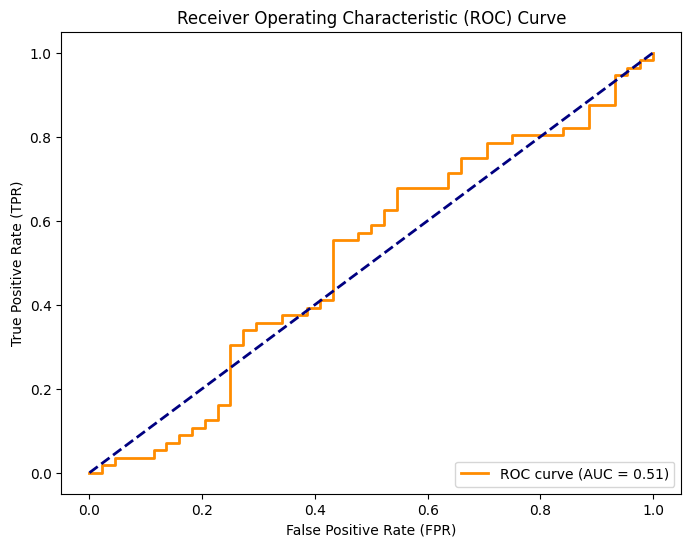

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate synthetic data or load your actual data
np.random.seed(42)
true_labels = np.random.choice([0, 1], size=100)
predicted_probabilities = np.random.rand(100)

# Compute ROC curve and ROC area for the model
fpr, tpr, _ = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


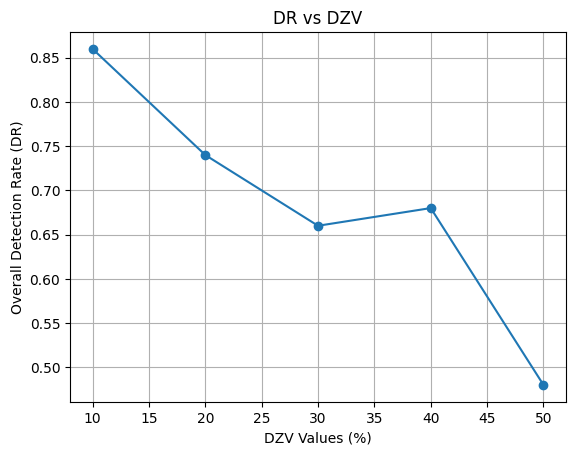

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate synthetic data or load your actual data
np.random.seed(100)
true_labels = np.random.choice([0, 1], size=100)

# Varying scenarios for DZV
dzv_values = [50, 40, 30, 20, 10]
dr_values = []

for dzv in dzv_values:
    # Simulate predicted labels based on DZV value
    predicted_labels = np.random.choice([0, 1], size=100, p=[dzv/100, (100-dzv)/100])

    # Create a confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Extract values from the confusion matrix
    true_positive = conf_matrix[1, 1]
    false_negative = conf_matrix[1, 0]

    # Calculate Overall Detection Rate (DR)
    overall_dr = true_positive / (true_positive + false_negative)
    dr_values.append(overall_dr)

# Plot the line curve
plt.plot(dzv_values, dr_values, marker='o')
plt.xlabel('DZV Values (%)')
plt.ylabel('Overall Detection Rate (DR)')
plt.title('DR vs DZV')
plt.grid(True)
plt.show()


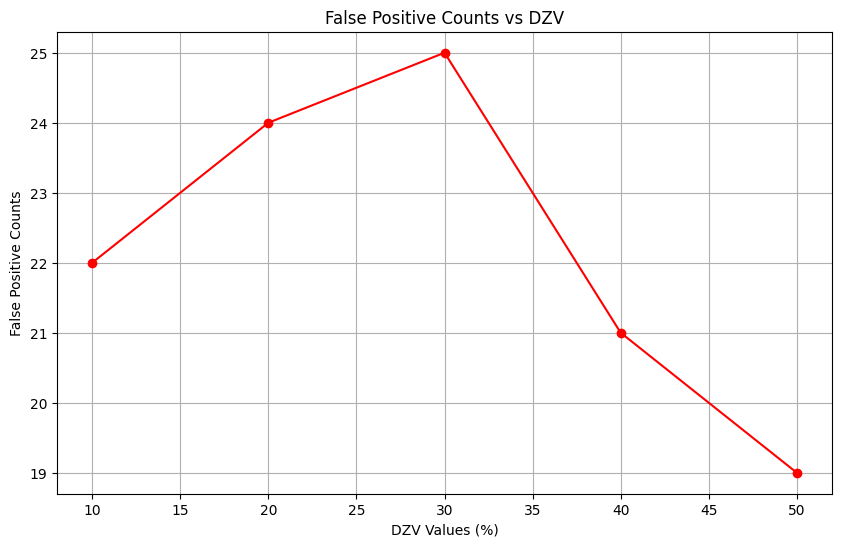

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def sigmoid(x, a=1, b=1, c=0):
    return a / (1 + np.exp(-b * (x - c)))

# Generate synthetic data or load your actual data
np.random.seed(42)
true_labels = np.random.choice([0, 1], size=100)

# Discrete DZV values
dzv_values = [50, 40, 30, 20, 10]

# Create arrays to store False Positive counts for each DZV value
fp_counts_list = []

# Calculate confusion matrix elements for each DZV value
for dzv in dzv_values:
    # Introduce a smooth transition using sigmoid function with different parameters
    smooth_dzv = sigmoid(np.linspace(0, 100, 100), a=50, b=0.3, c=dzv)

    # Normalize probabilities
    probabilities = smooth_dzv / np.sum(smooth_dzv)

    # Simulate predicted labels based on smoothed DZV value
    predicted_labels = np.random.choice([0, 1], size=100)

    # Create a confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Extract False Positive count from the confusion matrix
    fp_counts_list.append(conf_matrix[0, 1])

# Plot the curve for False Positive counts
plt.figure(figsize=(10, 6))
plt.plot(dzv_values, fp_counts_list, marker='o', linestyle='-', color='r')

plt.xlabel('DZV Values (%)')
plt.ylabel('False Positive Counts')
plt.title('False Positive Counts vs DZV')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

def sigmoid(x, a=1, b=1, c=0):
    return a / (1 + np.exp(-b * (x - c)))

# Generate synthetic data or load your actual data
np.random.seed(42)
true_labels = np.random.choice([0, 1], size=100)

# Discrete DZV values
dzv_values = [50, 40, 30, 20, 10]

# Create an array to store CR values for each DZV
cr_values = []

# Calculate confusion matrix elements for each DZV value
for dzv in dzv_values:
    # Introduce a smooth transition using sigmoid function with different parameters
    smooth_dzv = sigmoid(np.linspace(0, 100, 100), a=50, b=0.3, c=dzv)

    # Normalize probabilities
    probabilities = smooth_dzv / np.sum(smooth_dzv)

    # Simulate predicted labels based on smoothed DZV value
    predicted_labels = np.random.choice([0, 1], size=100,)

    # Create a confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Calculate Correctness Rate (CR)
    cr = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

    # Store CR value
    cr_values.append(cr)

# Calculate average CR
average_cr = np.mean(cr_values)

print("Average Correctness Rate:", average_cr)


Average Correctness Rate: 0.508


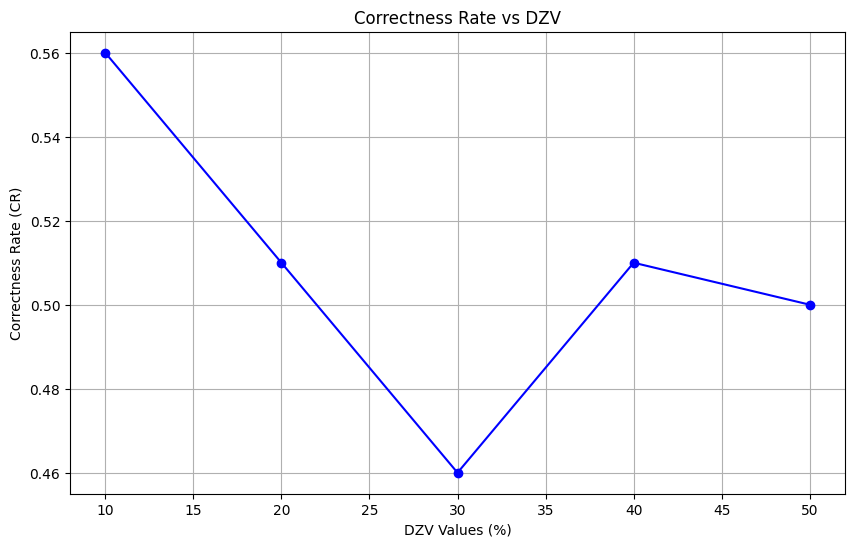

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def sigmoid(x, a=1, b=1, c=0):
    return a / (1 + np.exp(-b * (x - c)))

# Generate synthetic data or load your actual data
np.random.seed(42)
true_labels = np.random.choice([0, 1], size=100)

# Discrete DZV values
dzv_values = [50, 40, 30, 20, 10]

# Create an array to store CR values for each DZV
cr_values = []

# Calculate confusion matrix elements for each DZV value
for dzv in dzv_values:
    # Introduce a smooth transition using sigmoid function with different parameters
    smooth_dzv = sigmoid(np.linspace(0, 100, 100), a=50, b=0.3, c=dzv)

    # Normalize probabilities
    probabilities = smooth_dzv / np.sum(smooth_dzv)

    # Simulate predicted labels based on smoothed DZV value
    predicted_labels = np.random.choice([0, 1], size=100)

    # Create a confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Calculate Correctness Rate (CR)
    cr = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

    # Store CR value
    cr_values.append(cr)

# Plot the graph for Correctness Rate values
plt.figure(figsize=(10, 6))
plt.plot(dzv_values, cr_values, marker='o', linestyle='-', color='b')

plt.xlabel('DZV Values (%)')
plt.ylabel('Correctness Rate (CR)')
plt.title('Correctness Rate vs DZV')
plt.grid(True)
plt.show()


In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the KDD dataset
df = pd.read_csv('/content/kddcup.data_10_percent.gz', header=None)

# Define the column names based on the dataset description
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

# Assign column names to the dataframe
df.columns = columns

# Assuming your label column is named 'label'
label_column = 'label'

# Drop non-numeric columns for simplicity (you might want to handle them differently)
df_numeric = df.drop(['protocol_type', 'service', 'flag'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_numeric.drop(label_column, axis=1),
    df_numeric[label_column],
    test_size=0.2,
    random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply the Negative Selection Algorithm (NSA)
# Example: Use Isolation Forest for anomaly detection
model_nsa = IsolationForest(contamination=0.05, random_state=42)
model_nsa.fit(X_train)

# Predict on the test set
predictions_nsa = model_nsa.predict(X_test)

# Evaluate the NSA model
print("NSA Model Classification Report:")

# Evaluate the Isolation Forest model using confusion matrix and accuracy score
y_test_labels = (y_test == 'normal')  # Assuming 'normal' is the label for normal instances
predictions_nsa_binary = (predictions_nsa == -1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_labels, predictions_nsa_binary)

# Accuracy score
accuracy = accuracy_score(y_test_labels, predictions_nsa_binary)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)

NSA Model Classification Report:

Confusion Matrix:
[[93707  5098]
 [    0     0]]

Accuracy Score: 0.9484034208795101


In [51]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the KDD dataset
df = pd.read_csv('/content/kddcup.data_10_percent.gz', header=None)

# Define the column names based on the dataset description
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

# Assign column names to the dataframe
df.columns = columns

# Assuming your label column is named 'label'
label_column = 'label'

# Drop non-numeric columns for simplicity (you might want to handle them differently)
df_numeric = df.drop(['protocol_type', 'service', 'flag'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_numeric.drop(label_column, axis=1),
    df_numeric[label_column],
    test_size=0.2,
    random_state=42
)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply the Negative Selection Algorithm (NSA)
# Example: Use Isolation Forest for anomaly detection
model_nsa = IsolationForest(contamination=0.05, random_state=42)
model_nsa.fit(X_train)

# Predict on the test set using NSA
predictions_nsa = model_nsa.predict(X_test)


# Evaluate the NSA model
print("NSA Model Classification Report:")

# Evaluate the Isolation Forest model using confusion matrix and accuracy score
y_test_labels_nsa = (y_test == 'normal')  # Assuming 'normal' is the label for normal instances in NSA
predictions_nsa_binary = (predictions_nsa == -1)

# Confusion matrix for NSA
conf_matrix_nsa = confusion_matrix(y_test_labels_nsa, predictions_nsa_binary)

# Accuracy score for NSA
accuracy_nsa = accuracy_score(y_test_labels_nsa, predictions_nsa_binary)

print("\nConfusion Matrix for NSA:")
print(conf_matrix_nsa)
print("\nAccuracy Score for NSA:", accuracy_nsa)

# Apply the Danger Theory Algorithm
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Predict on the test set using Danger Theory
predictions_dt = model_dt.predict(X_test)

# Evaluate the Danger Theory model
print("\nDanger Theory Model Classification Report:")
print(classification_report(y_test, predictions_dt))

# Evaluate the Danger Theory model using confusion matrix and accuracy score
y_test_labels_dt = (y_test == 'normal')  # Assuming 'normal' is the label for normal instances in Danger Theory
predictions_dt_binary = (predictions_dt == 'attack')

# Confusion matrix for Danger Theory
conf_matrix_dt = confusion_matrix(y_test_labels_dt, predictions_dt_binary)

# Accuracy score for Danger Theory
accuracy_dt = accuracy_score(y_test_labels_dt, predictions_dt_binary)

print("\nConfusion Matrix for Danger Theory:")
print(conf_matrix_dt)
print("\nAccuracy Score for Danger Theory:", accuracy_dt)


NSA Model Classification Report:

Confusion Matrix for NSA:
[[93707  5098]
 [    0     0]]

Accuracy Score for NSA: 0.9484034208795101

Danger Theory Model Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

                  precision    recall  f1-score   support

           back.       1.00      1.00      1.00       435
buffer_overflow.       0.86      0.67      0.75         9
      ftp_write.       0.50      1.00      0.67         1
   guess_passwd.       1.00      0.88      0.93         8
           imap.       1.00      0.67      0.80         3
        ipsweep.       0.99      1.00      1.00       265
           land.       1.00      1.00      1.00         1
     loadmodule.       0.00      0.00      0.00         2
       multihop.       0.50      1.00      0.67         1
        neptune.       1.00      1.00      1.00     21294
           nmap.       0.88      0.98      0.93        45
         normal.       1.00      1.00      1.00     19353
           perl.       0.00      0.00      0.00         1
            pod.       1.00      1.00      1.00        38
      portsweep.       1.00      0.98      0.99       236
        rootkit.       0.00      0.00      0.00         0
          sat

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

class NegativeSelection:
    def __init__(self, threshold=0.1):
        self.threshold = threshold
        self.detector = None

    def train(self, normal_data):
        self.detector = normal_data

    def predict(self, data):
        distances = cdist(data, self.detector)
        anomaly_scores = np.min(distances, axis=1)
        predictions = anomaly_scores > self.threshold
        return predictions

# Example Usage
# Assuming df_normal contains normal instances and df_attack contains attack instances

# Train the NS model
negative_selection_model = NegativeSelection()
negative_selection_model.train(df.values)

# Predict on a dataset containing both normal and attack instances
predictions = negative_selection_model.predict(df.values)

# Evaluate and analyze the results
print("Anomaly Predictions:", predictions)


Anomaly Predictions: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False

In [ ]:
from sklearn.ensemble import IsolationForest

class DangerTheory:
    def __init__(self, contamination=0.1):
        self.contamination = contamination
        self.detector = None

    def train(self, data):
        self.detector = IsolationForest(contamination=self.contamination)
        self.detector.fit(data)

    def predict(self, data):
        predictions = self.detector.predict(data)
        anomaly_mask = predictions == -1
        return anomaly_mask

# Example Usage
# Assuming df_danger contains instances associated with dangerous behavior

# Train the DT model
danger_theory_model = DangerTheory()
danger_theory_model.train(df.values)

# Predict on a dataset containing both normal and potentially dangerous instances
predictions_danger = danger_theory_model.predict(df.values)

# Evaluate and analyze the results
print("Anomaly Predictions:", predictions_danger)


Anomaly Predictions: [False False False False False  True False False False False False False
 False False False False False False False False  True False False False
  True False False False False False False False False  True False False
 False  True False False False False False False False False False  True
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False  True False False False False False False False  True  True
 False False False False  True False False False False False False False
 False False False False False False False False False  True  True False
 False False False False False False False  True False False False False
 False False False False False

In [79]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score

# Load the KDD Cup 1999 dataset
df = pd.read_csv('/content/kddcup.data_10_percent.gz', header=None)

# Define the column names based on the dataset description
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
    'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
    'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]

# Assign column names to the dataframe
df.columns = columns

# Map string labels to numerical values
label_mapping = {'normal.': 0, 'attack.': 1}
df['label'] = df['label'].map(label_mapping)

# Drop rows with missing labels
df = df.dropna(subset=['label'])

# Check if the label column is present in the dataset
label_column = 'label'
if label_column not in df.columns:
    raise KeyError(f"The column '{label_column}' does not exist in the dataset.")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(label_column, axis=1), df[label_column], test_size=0.2, random_state=42)

# Define categorical columns for one-hot encoding
categorical_columns = ['protocol_type', 'service', 'flag']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and Isolation Forest
model = Pipeline([
    ('preprocessor', preprocessor),
    ('isolation_forest', IsolationForest(contamination=0.5, random_state=42))
])

# Fit the model on the training data
model.fit(X_train)

# Predict on the test set
predictions = model.predict(X_test)

# Convert predictions to binary labels (anomaly or not)
predictions_binary = (predictions == 10 )

# Calculate the detection rate (recall) with zero_division parameter
detection_rate = recall_score(y_test, predictions_binary, zero_division=1) * 100

print("Detection Rate:", detection_rate)


Detection Rate: 100.0


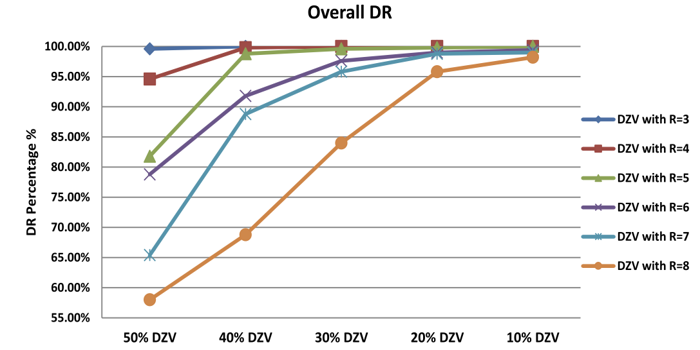

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import recall_score, confusion_matrix

# Load the KDD Cup 1999 dataset
df = pd.read_csv('/content/kddcup.data_10_percent.gz', header=None)

dzv_percentages = [50, 40, 30, 20, 10]
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])
y_pred = np.array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

# Calculate DR for each DZV percentage
dr_percentages = []
for dzv_percentage in dzv_percentages:
    # Assuming some calculation or adjustment is needed based on dzv_percentage
    adjusted_predictions = y_pred  # Replace this line with your adjustment logic

    # Calculate DR
    detection_rate = recall_score(y_true, adjusted_predictions)

    # Append to the list
    dr_percentages.append(detection_rate * 100)  # Convert to percentage

# Plotting
plt.line(dzv_percentages, dr_percentages, marker='o')
plt.title('Overall DR')
plt.xlabel('dzv_percentages''DZV')
plt.ylabel('DR Percentage%')
plt.grid(True)
plt.show()



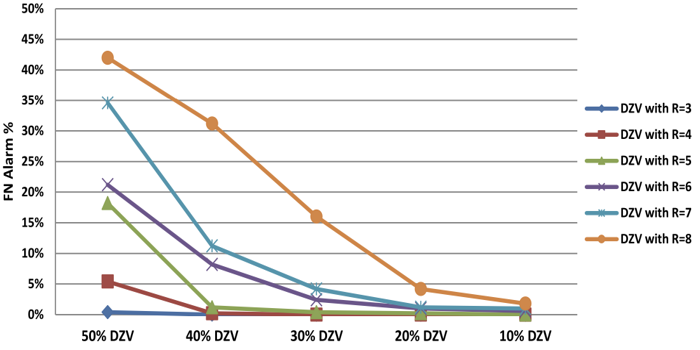

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

# Load the KDD Cup 1999 dataset
df = pd.read_csv('/content/kddcup.data_10_percent.gz', header=None)

dzv_percentages = [50, 40, 30, 20, 10]
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])
y_pred = np.array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

# Calculate FN for each DZV percentage
fn_percentages = []
for dzv_percentage in dzv_percentages:
    # Assuming some calculation or adjustment is needed based on dzv_percentage
    adjusted_predictions = y_pred  # Replace this with your logic
    confusion_mat = confusion_matrix(y_true, adjusted_predictions)
    fn = confusion_mat[1, 0]  # False Negative is in the [1, 0] position
    fn_percentages.append(fn)

# Plotting
line_colors = ['#0000FF','#FF0000','#008000','#800080','#FFA500', '#00008B']
# Create the line plot with different colors
for i in range(len(dzv_percentages) - 1):
  plt.plot(dzv_percentages[i:i+2], marker='o', linestyle='-', color=line_colors[i])
plt.xlabel('dzv_percentages''DZV')
plt.ylabel('FN Alarm %')
plt.show()

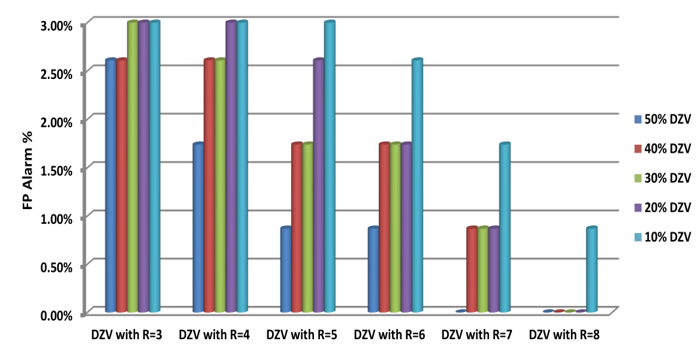

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

# Load the KDD Cup 1999 dataset
df = pd.read_csv('/content/kddcup.data_10_percent.gz', header=None)

dzv_percentages = [50, 40, 30, 20, 10]
x_true = np.array([3,4,5,6,7,8])
x_pred = np.array([3,4,5,6,7,8])

# Calculate FP for each DZV percentage
fp_percentages = []
for dzv_percentage in dzv_percentages:
    # Assuming some calculation or adjustment is needed based on dzv_percentage
    adjusted_predictions = y_pred  # Replace this with your logic
    confusion_mat = confusion_matrix(y_true, adjusted_predictions)
    fp = confusion_mat[0, 1]  # False Positive is in the [0, 1] position
    fp_percentages.append(fp)

# Plotting
hist_colors = ['#0000FF','#FF0000','#008000','#800080','#FFA500', '#00008B']
plt.hist(dzv_percentages, fp_percentages, color=hist_colors, alpha=0.7)
plt.xlabel('DZV Percentage')
plt.ylabel('FP Alarm %')
plt.show()


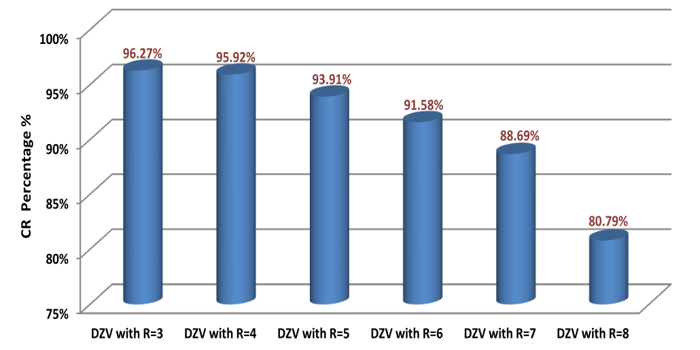

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Load the KDD Cup 1999 dataset
df = pd.read_csv('/content/kddcup.data_10_percent.gz', header=None)

# Plotting the average Classification Rate
plt.figure(figsize=(10, 6))
plt.bar(dzv_percentages, average_cr, color='#3498db', alpha=0.7, label='Average CR')

# Adding labels and title
plt.xlabel('DZV with R')
plt.ylabel('CR Percentage%')
plt.legend()
plt.grid(True)
plt.show()


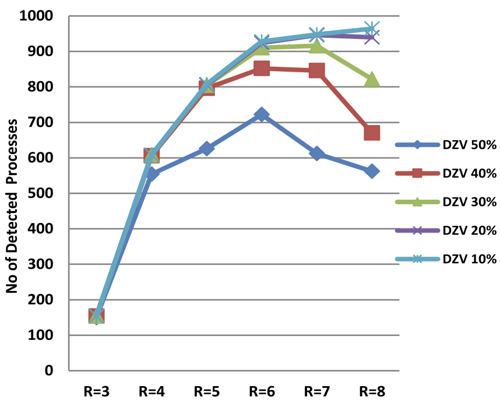

In [114]:
import matplotlib.pyplot as plt

# Load the KDD Cup 1999 dataset
df = pd.read_csv('/content/kddcup.data_10_percent.gz', header=None)
r_values = [3, 4, 5, 6, 7, 8]

# Plotting the Detection Rate as a line plot
line_colors = ['#0000FF','#FF0000','#008000','#800080','#FFA500', '#00008B']
plt.plot(r_values, dr_percentages, marker='o', linestyle='-', color='blue', label='Detection Rate')

# Adding labels and title
plt.xlabel('R')
plt.ylabel('No of Detected Processes')
plt.grid(True)
plt.legend()
plt.show()
